<a href="https://colab.research.google.com/github/jhbale11/Object_Detection/blob/main/model_maker_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Environment Setting

In [2]:
!pip install -q tflite-model-maker

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

# Download Open Image v4

In [4]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [5]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [6]:
!pip3 install -r requirements.txt

In [7]:
!python3 main.py

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.
main.py: error: the following arguments are required: <command> 'downloader', 'visualizer' or 'ill_downloader'.


--classes 뒤에 원하는 class를 띄어쓰기로 구분하여 쓸 것!
필요한 class 목록 : Calculator Computer monitor Computer mouse Computer keyboard Mobile phone Pencil case Digital clock Tablet computer Pen Glasses



In [8]:
! python3 main.py downloader --classes Tablet_computer Pen Pencil_case --noLabels --type_csv train


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Tablet computer.

Tablet computer
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 784 online images for train.
    [INFO] | All images already downloaded.
    [INFO] | Downloading

# Get the data path

In [49]:
import os, glob
 
import os.path
 
targerdir = '/content/OIDv4_ToolKit/OID/Dataset/train/Tablet computer'
 
files = os.listdir(targerdir)
 
for i in files :
 
    print(i)

423cd55b87bef999.jpg
3ab040a9bbaedcf7.jpg
453cc223dbee88ad.jpg
39baa620769b7ade.jpg
4105533fe46dfba9.jpg
c253e62ef256495c.jpg
e9c26158bae84977.jpg
0237ca95380a2f55.jpg
95c9cba48676e46d.jpg
059286359845d2f3.jpg
e4e45c4d7eeb73f3.jpg
b7a3a3c9f44f2ee6.jpg
dd3b5def4e2bb0b7.jpg
657e9944f057f8d5.jpg
841648ee804ee84d.jpg
26389fb5979c8834.jpg
c358e3077f9a3b6a.jpg
2ed7439a7a2013e1.jpg
314236caf25a12cc.jpg
0275601bae8a7551.jpg
7f19a9f178f7d62a.jpg
a197536b7209dc55.jpg
79a29ca6341a06ef.jpg
5fb8cb6292d26512.jpg
73116bd19b8e9116.jpg
dd79fdb79fecf0d3.jpg
93abeccfc7e428d4.jpg
5c54956fb78bfe61.jpg
576f147028fcc4d3.jpg
0db9920f0247239a.jpg
20754194de35946c.jpg
6d16f795a6dd7668.jpg
db4a2946409df49d.jpg
1a74faca954b3c24.jpg
3914b81c6e0b3a26.jpg
05b309cc2d4ed497.jpg
0ab855e3c882dd63.jpg
d8e88c2d74fd6e00.jpg
01113a4be2f691ee.jpg
a66aeb80b3fe2aa1.jpg
727e113a3f2e60f3.jpg
4d5478d0a04aeaa0.jpg
c359eb3f5414a37a.jpg
1ebdd9d223ef1273.jpg
60aa3f04ac8af417.jpg
17e9567a14763210.jpg
5f290fc0bc20944d.jpg
79d005e39b158

colab에서 실시간 저장 시 자동으로 .ipynb_checkpoints 파일이 생성되므로 이를 찾아서 지워주어야 함.

In [46]:
!rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Tablet\ computer/.ipynb_checkpoints
!rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Pen/.ipynb_checkpoints
!rm -r /content/OIDv4_ToolKit/OID/Dataset/train/Pencil\ case/.ipynb_checkpoints

rm: cannot remove '/content/OIDv4_ToolKit/OID/Dataset/train/Tablet computer/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/OIDv4_ToolKit/OID/Dataset/train/Pen/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/OIDv4_ToolKit/OID/Dataset/train/Pencil case/.ipynb_checkpoints': No such file or directory


In [50]:
from pathlib import Path

image_path = '/content/OIDv4_ToolKit/OID/Dataset/train'
image_path = os.path.join(os.path.dirname(root_image_path), 'train')

In [51]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 1890, num_label: 3, labels: Pen, Pencil case, Tablet computer.


INFO:tensorflow:Load image with size: 1890, num_label: 3, labels: Pen, Pencil case, Tablet computer.


# Example Running

In [52]:
train_data, rest_data = data.split(0.9)
validation_data, test_data = rest_data.split(0.5)

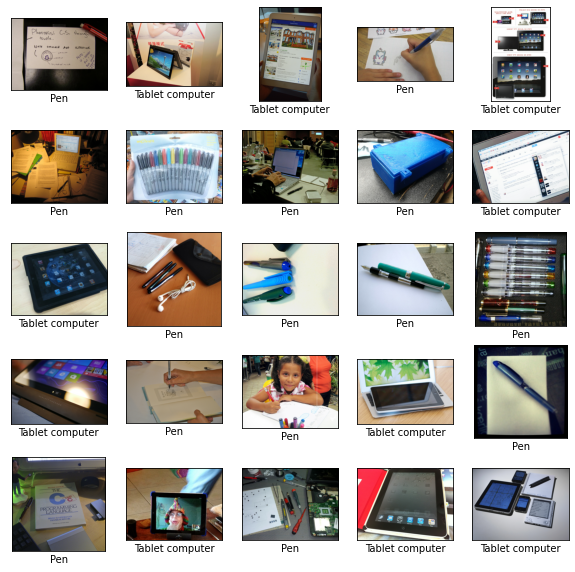

In [53]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

# Train Model

In [54]:
# Load Model mobilenet_SSD_v2
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'))

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_7 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
53/53 [==============================] - 105s 2s/step - loss: 0.8099 - accuracy: 0.7466
Epoch 2/5
53/53 [==============================] - 101s 2s/step - loss: 0.4545 - accuracy: 0.9357
Epoch 3/5
53/53 [==============================] - 100s 2s/step - loss: 0.4200 - accuracy: 0.9568
Epoch 4/5
53/53 [==============================] - 101s 2s/step - loss:

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_7 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [56]:
loss, accuracy = model.evaluate(test_data) #Show loss, accuracy

3/3 [==============================] - 14s 2s/step - loss: 0.4678 - accuracy: 0.9263


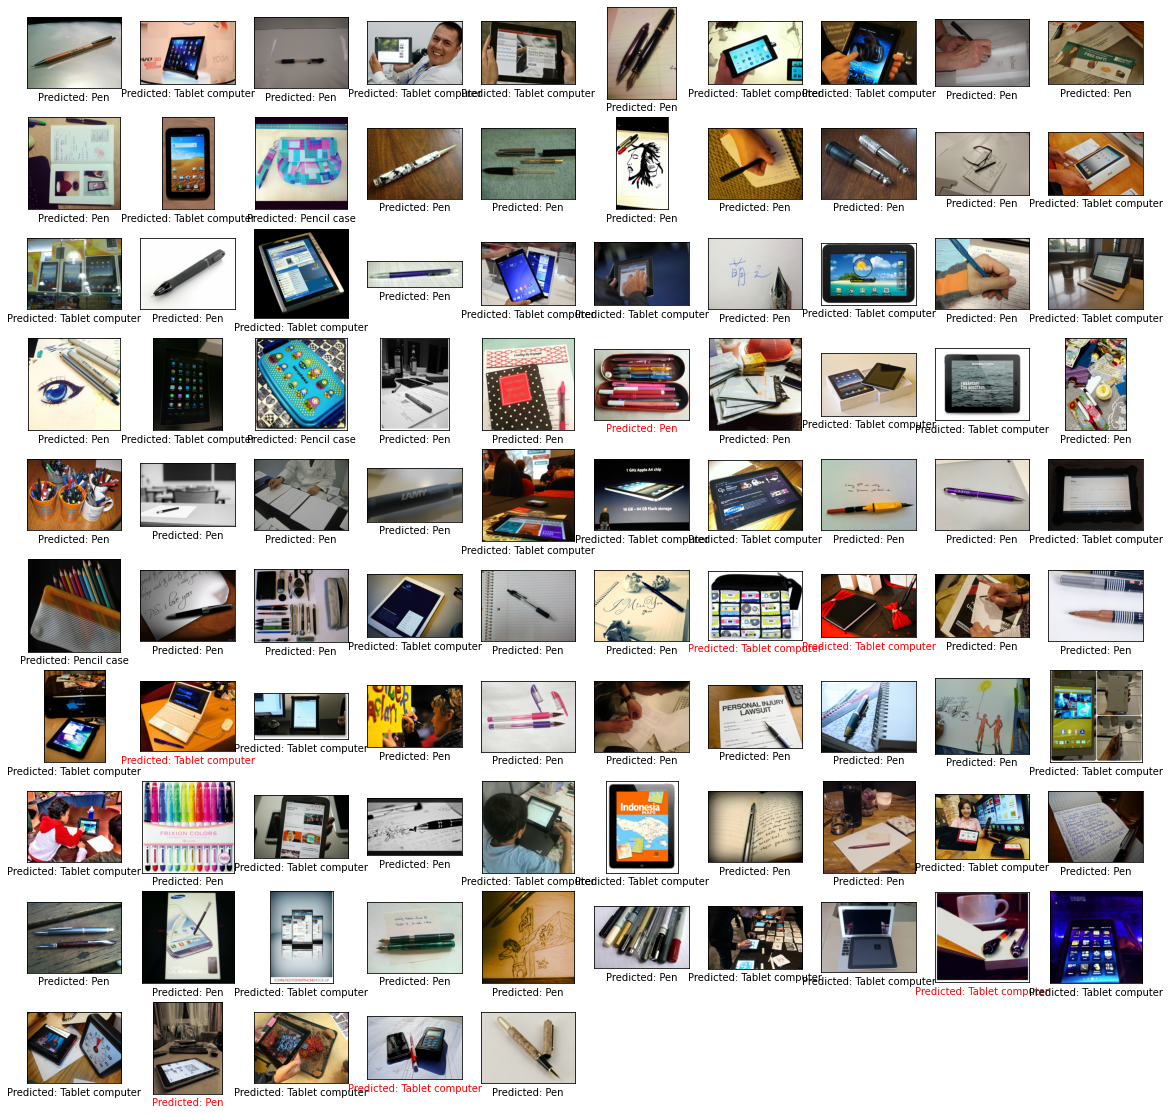

In [57]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

# Export Model

In [ ]:
model.export(export_dir='.') # Export Format TFLITE or SAVED_MODEL

In [ ]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

In [ ]:
model.evaluate_tflite('model.tflite', test_data)